# <center> K-Means Clustering (K-Medias) </center>

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# Cargar el conjunto de datos
vinos = load_wine()

In [4]:
print(vinos.data.shape)

(178, 13)


In [5]:
# Ver los nombres de las clases de vino
print(vinos.target_names)

['class_0' 'class_1' 'class_2']


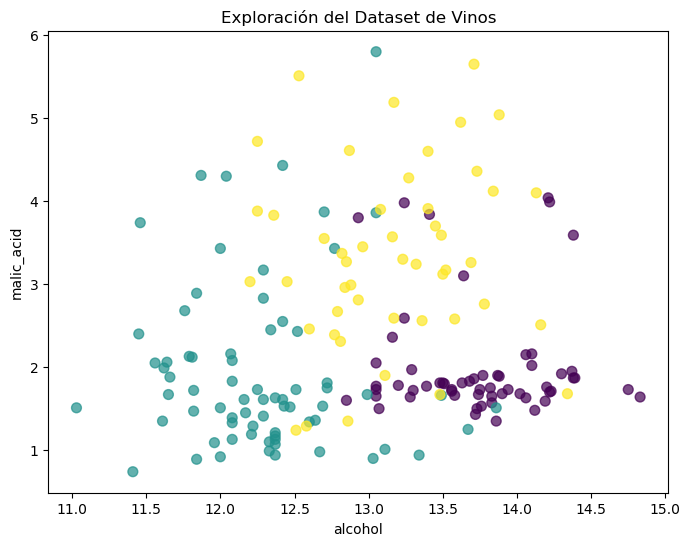

In [6]:
# Convertir a variables más manejables
X = vinos.data  # Características químicas
y = vinos.target  # Clases (0, 1, 2)

# Elegir dos características para el scatter plot (por ejemplo, alcohol y acidez)
feature_x = 0  # Índice de la característica 'alcohol'
feature_y = 1  # Índice de la característica 'malic_acid'

# Crear el scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, feature_x], X[:, feature_y], c=y, cmap='viridis', s=50, alpha=0.7)
plt.xlabel(vinos.feature_names[feature_x])  # Nombre de la característica en el eje X
plt.ylabel(vinos.feature_names[feature_y])  # Nombre de la característica en el eje Y
plt.title('Exploración del Dataset de Vinos')
plt.show()


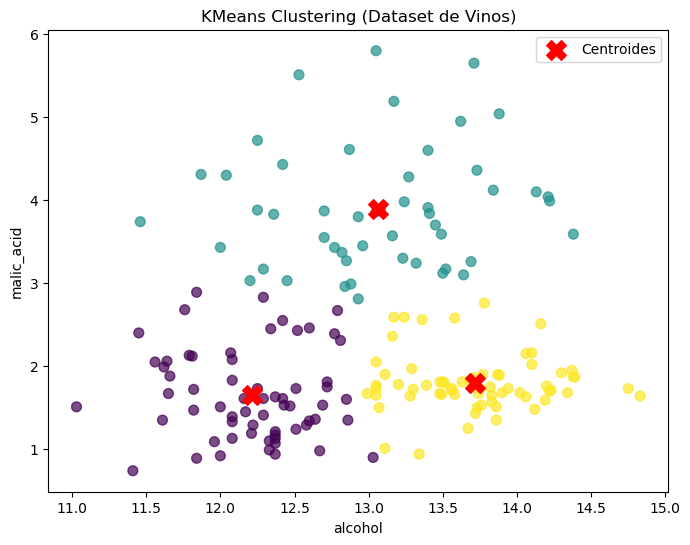

In [7]:
# Seleccionar las características 'alcohol' y 'malic_acid'
X = vinos.data[:, [0, 1]]  # Índices 0 y 1 corresponden a 'alcohol' y 'malic_acid'

# Aplicar KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Tres clusters para las tres clases
kmeans.fit(X)
clusters = kmeans.labels_  # Etiquetas de los clusters asignados

# Crear el scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroides')

plt.xlabel(vinos.feature_names[0])  # Nombre de la característica en el eje X ('alcohol')
plt.ylabel(vinos.feature_names[1])  # Nombre de la característica en el eje Y ('malic_acid')
plt.title('KMeans Clustering (Dataset de Vinos)')
plt.legend()
plt.show()
